In [90]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
training = pd.read_csv(r'E:\ML Learning\PROJECT_TITANIC\Data\train.csv')
testing = pd.read_csv(r'E:\ML Learning\PROJECT_TITANIC\Data\test.csv')

In [92]:
training.describe()
training.info()
training['Survived'].value_counts()
#549 survived and 342 dead
#There are missing variables in Age, Cabin and Embarked.
training.drop('Survived', axis = 1)
survived = training['Survived']
train_idx = training['PassengerId']
test_idx = testing['PassengerId']

# DATA DESCRIPTION : 
# survival  : 0 = no , 1 = yes
# pclass : ticket class. 1 =1st, 2=2nd, 3=3rd (socio economic status)
# sex : sex
# age : age in years
# sibsp : number of siblings on the Titanic
# parch : number of parents on the Titanic
# ticket : ticket number
# fare : passenger fare
# canbin : Cabin number
# embarked : Port of embarkatoin : C = Cherbourg, Q = Queenstown, S = Southampton.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [93]:
training_num = training[['Age', 'SibSp','Parch', 'Fare'] ]
training_cat = training[['Survived',  'Pclass','Sex','Ticket','Cabin','Embarked']]

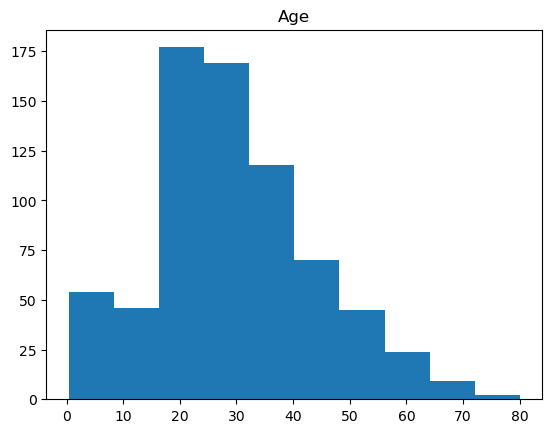

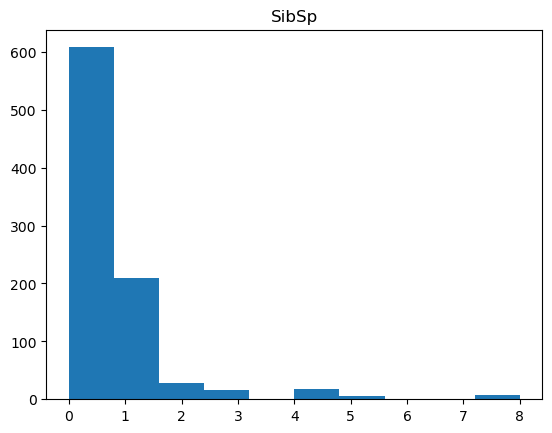

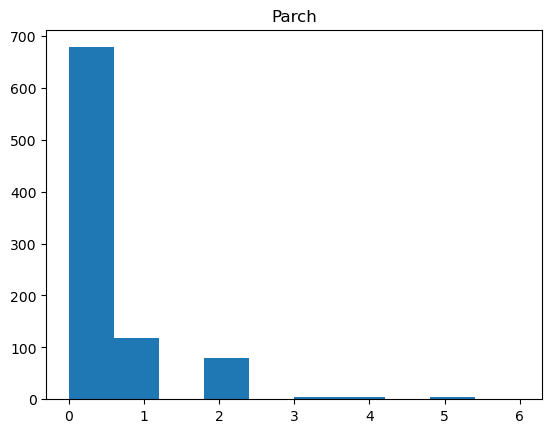

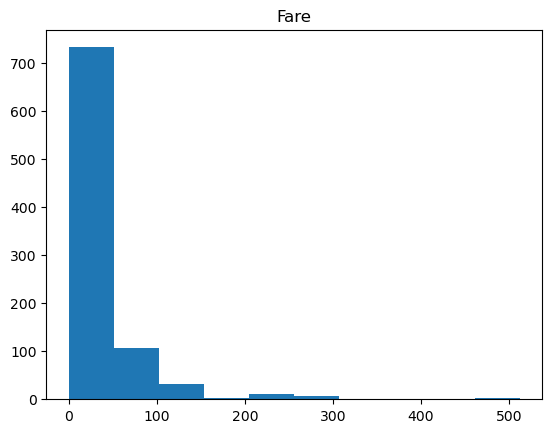

In [94]:
#Visualizing : General data.
for i in training_num.columns:
    plt.hist(training_num[i])
    plt.title(i)
    plt.show()


In [95]:
training_num.columns

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

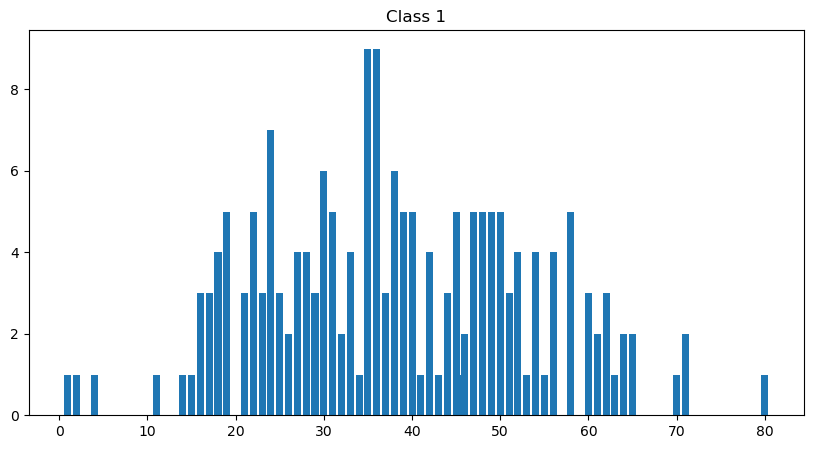

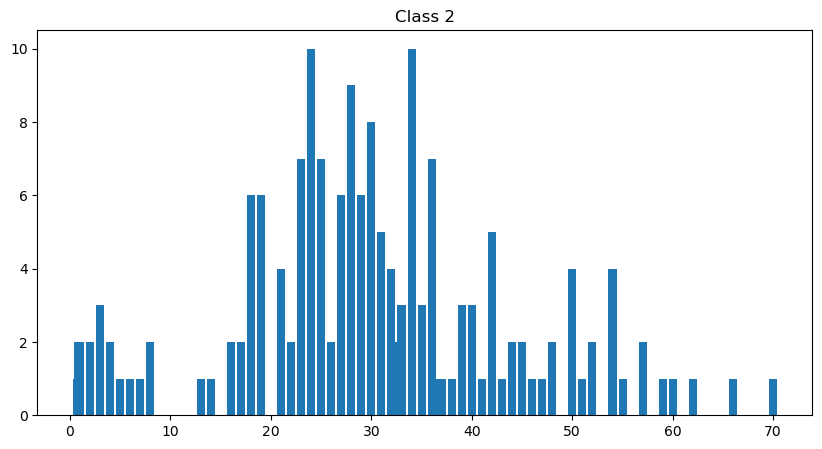

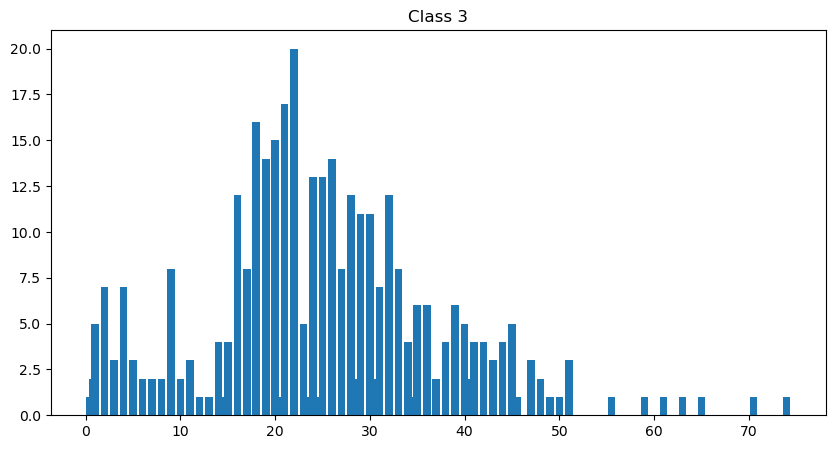

In [96]:
for i in range (1,4) : 
    plt.figure(figsize=(10,5))
    plt.title('Class' + ' ' + str(i))
    y = training[training['Pclass'] == i]['Age'].value_counts()
    x = y.index.values
    plt.bar(x,y)
    plt.show() 

In [97]:
training[training['Pclass'] == 2]['Age'].value_counts()

Age
34.00    10
24.00    10
28.00     9
30.00     8
23.00     7
25.00     7
36.00     7
27.00     6
29.00     6
19.00     6
18.00     6
31.00     5
42.00     5
50.00     4
54.00     4
32.00     4
21.00     4
40.00     3
3.00      3
39.00     3
35.00     3
33.00     3
48.00     2
4.00      2
57.00     2
45.00     2
52.00     2
2.00      2
22.00     2
26.00     2
16.00     2
8.00      2
44.00     2
1.00      2
0.83      2
32.50     2
17.00     2
55.00     1
47.00     1
0.67      1
6.00      1
66.00     1
5.00      1
60.00     1
70.00     1
37.00     1
7.00      1
62.00     1
41.00     1
13.00     1
36.50     1
51.00     1
46.00     1
38.00     1
59.00     1
43.00     1
14.00     1
Name: count, dtype: int64

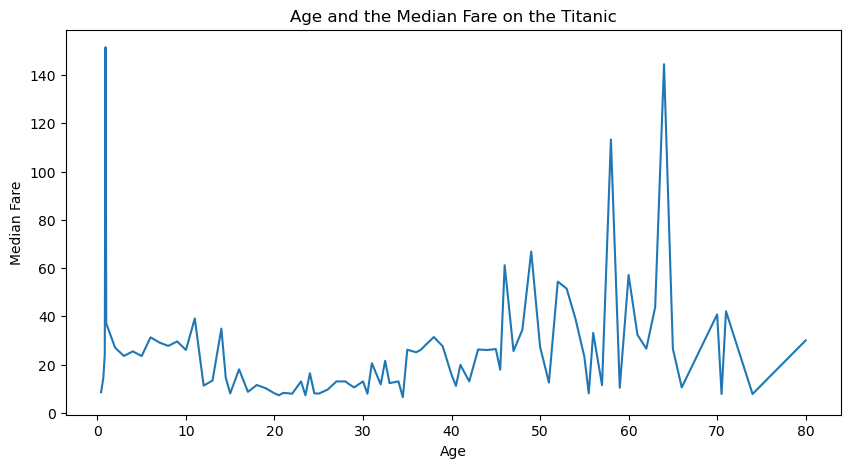

In [98]:
plt.figure(figsize=(10,5))
plt.plot(training.groupby('Age')['Fare'].median().index, training.groupby('Age')['Fare'].median())
plt.xlabel('Age')
plt.ylabel('Median Fare')
plt.title('Age and the Median Fare on the Titanic')
plt.show()

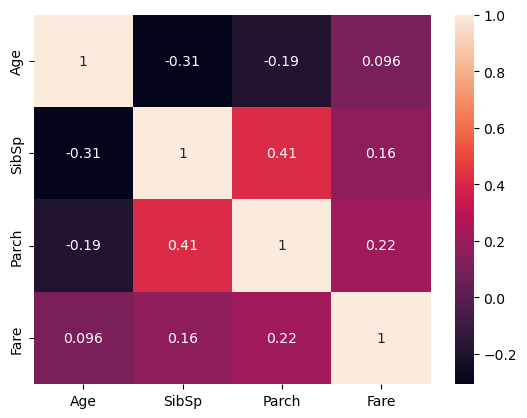

In [99]:
sns.heatmap(training_num.corr(method='pearson', numeric_only=True), annot= True)
plt.show()

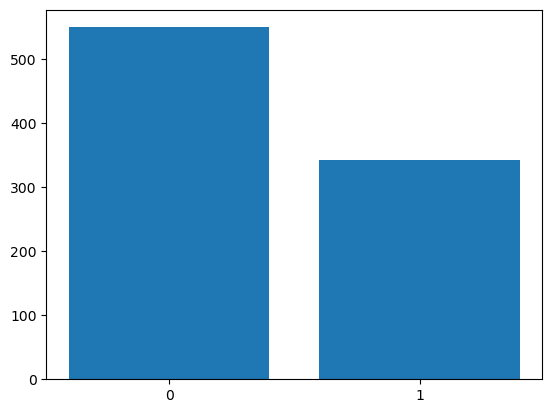

In [100]:

plt.bar(training['Survived'].value_counts().index, training['Survived'].value_counts())
plt.xticks(np.arange(0,2))
plt.show()


In [101]:
#FIlling nulls : In age
training_dp = training

training_dp['Age'].fillna(training['Age'].median(), inplace = True)



C:\Users\Admin\AppData\Local\Temp\ipykernel_33688\192529376.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_dp['Age'].fillna(training['Age'].median(), inplace = True)


In [102]:
training[training['Embarked'].isnull()]
#Same Pclass and same ticket as well as fare. The embarked location is likely to be the same"

#Guessing the embarked location through Pclass and Fare (closer fare)
sim_emb = training_dp[ (training_dp['Pclass'] == 1) & (training_dp['Fare'] >= 70) & (training_dp['Fare'] <= 90)]['Embarked']
print("median : ", sim_emb.value_counts())
#20 S and 19 C. Fine tuning is possible but i will just take the highest one for the sake of simplicity
training_dp['Embarked'].fillna('S', inplace= True)



median :  Embarked
S    20
C    19
Q     2
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_33688\3895099961.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_dp['Embarked'].fillna('S', inplace= True)


In [103]:
#feature engineering
#cabin got a lot of missing values. Because there are so much missing data, we must approach it from another angle
# Probable solutions : Dropping, trying to fill it. Since giving the machine learning program datas that are predicted is very harmful to the accuracy, we can drop it
#However, i shall attemt to fill it.
#creating a new variable. call it M. This is to simplify the cabin data


training_dp['Cabin'].fillna('M', inplace = True)
training_dp['Cabin'] = training_dp['Cabin'].str[0]

#The cabin is also simplified as there are too many cabin variables


C:\Users\Admin\AppData\Local\Temp\ipykernel_33688\1199906215.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_dp['Cabin'].fillna('M', inplace = True)


In [104]:
training_dp['Cabin'].value_counts()

#T only has one variable. Might get overridden in the analysis so turning it into an M

training_dp['Cabin'] = training_dp['Cabin'].replace('T', 'M') 

In [105]:
training_dp['Cabin'].value_counts()



Cabin
M    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: count, dtype: int64

In [106]:
display(training_dp)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,M,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


In [107]:
print(training_dp.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [108]:
training_dp.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin            8
Embarked         3
dtype: int64

In [109]:
training_dp['Name'].unique()
#The data in the name is excessive. The name should be split up
names = training_dp['Name']

last_names = []
first_names = []
titles = []

names = training_dp['Name']
names

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [110]:
#Pattern : Titles stand before the '.'` Names might not have first name. If a name have a dot, there is first name . We splitting the string on the dot.
for name in names : 
    if '.' not in name : 
        last_names.append(' ')
    else :
        last, name = name.split(', ', 1)
        last_names.append(last)
    
    if '.' not in name :
        titles.append(' ')
    else :
        title, first = name.split('. ', 1)
        titles.append(title)
        first_names.append(first)
    




In [111]:
last_names = np.array(last_names)
first_names = np.array(first_names)
titles = np.array(titles)

In [112]:
np.unique(titles, return_counts= True)
#The titles has a lot of overlapping. We can change them to group by gender and group



(array(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',
        'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
        'the Countess'], dtype='<U12'),
 array([  1,   2,   1,   7,   1,   1,   2,  40, 182,   2,   1, 517, 125,
          1,   6,   1,   1], dtype=int64))

In [113]:
titles[np.where(np.isin(titles, ['Capt', 'Col','Major']))] = "Military"
titles[np.where(np.isin(titles, ['Don', 'Dona','Jonkheer', 'Master',' Lady','Sir', 'the Countess']))] = "Nobility"
titles[np.where(np.isin(titles, ['Miss', 'Mlle', 'Ms']))] = "Ms"
titles[np.where(np.isin(titles, ['Mrs','Mme']))] = "Mrs"


np.unique(titles, return_counts= True)


(array(['Dr', 'Lady', 'Military', 'Mr', 'Mrs', 'Ms', 'Nobility', 'Rev'],
       dtype='<U12'),
 array([  7,   1,   5, 517, 126, 185,  44,   6], dtype=int64))

In [114]:
training_dp['Title'] = titles
training_dp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [115]:
#standardizing
#binning age :
bins = np.array([0,10,20,30,40,50,60,70,80])

training_dp['Age_Bin'] = pd.cut(training_dp['Age'], bins)

display(training_dp)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,Rev,"(20, 30]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,Ms,"(10, 20]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,M,S,Ms,"(20, 30]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,Mr,"(20, 30]"


In [116]:
training_dp['Ticket'].nunique()
# 681 uniques... new ways

681

In [117]:
#dict : adding frequency of each unique ticket.
ticket_dict = dict(training_dp['Ticket'].value_counts())

print(ticket_dict)

training_dp['ticket_count'] = training_dp['Ticket'].map(ticket_dict)



{'347082': 7, 'CA. 2343': 7, '1601': 7, '3101295': 6, 'CA 2144': 6, '347088': 6, 'S.O.C. 14879': 5, '382652': 5, 'LINE': 4, 'PC 17757': 4, '17421': 4, '349909': 4, '113760': 4, '4133': 4, '113781': 4, 'W./C. 6608': 4, '2666': 4, '19950': 4, '347077': 4, 'C.A. 31921': 3, 'PC 17572': 3, 'C.A. 34651': 3, '363291': 3, 'F.C.C. 13529': 3, '345773': 3, '248727': 3, '24160': 3, '29106': 3, 'SC/Paris 2123': 3, '35273': 3, '371110': 3, '230080': 3, 'PC 17760': 3, '239853': 3, 'PC 17582': 3, '347742': 3, '110152': 3, '13502': 3, '110413': 3, 'PC 17755': 3, 'PC 17558': 2, '237736': 2, '17474': 2, 'PC 17758': 2, 'PP 9549': 2, 'S.O./P.P. 3': 2, 'P/PP 3381': 2, 'PC 17485': 2, '2668': 2, '2627': 2, 'PC 17604': 2, '2653': 2, '2665': 2, '113798': 2, '31027': 2, '2908': 2, 'W./C. 6607': 2, 'WE/P 5735': 2, '35281': 2, '113789': 2, '244367': 2, '231919': 2, '110465': 2, 'PC 17477': 2, '2699': 2, '367226': 2, '113806': 2, '230136': 2, '111361': 2, '113505': 2, '113803': 2, '370365': 2, '364849': 2, '358585'

In [118]:
display(training_dp)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,ticket_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,Rev,"(20, 30]",1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,Ms,"(10, 20]",1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,M,S,Ms,"(20, 30]",2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,Mr,"(20, 30]",1


In [119]:
training_dp["Fare_per_Ticket"] = training_dp['Fare'] / training_dp['ticket_count']


display(training_dp)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,ticket_count,Fare_per_Ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",1,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]",1,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,Rev,"(20, 30]",1,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,Ms,"(10, 20]",1,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,M,S,Ms,"(20, 30]",2,11.7250
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,Mr,"(20, 30]",1,30.0000


0.0
221.7792


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,ticket_count,Fare_per_Ticket
527,528,0,1,"Farthing, Mr. John",male,28.0,0,0,PC 17483,221.7792,C,S,Mr,"(20, 30]",1,221.7792


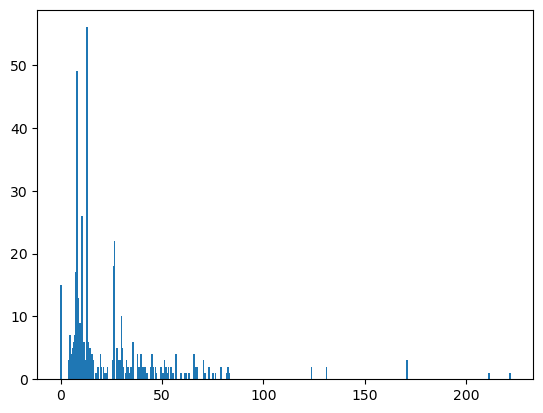

In [120]:

plt.bar(training_dp['Fare_per_Ticket'].value_counts().index.values,training_dp['Fare_per_Ticket'].value_counts() )
print(training_dp['Fare_per_Ticket'].min())
print(training_dp['Fare_per_Ticket'].max())

training_dp[training_dp['Fare_per_Ticket'] == 221.7792]




In [121]:
#binning for fare per ticket
bins = [0, 20 ,40 ,60 ,80 , 100, 250]
training_dp['Fare_Bin'] = pd.cut(training_dp['Fare_per_Ticket'] , bins)
training_dp[training_dp['Fare_per_Ticket'] == 221.7792]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,ticket_count,Fare_per_Ticket,Fare_Bin
527,528,0,1,"Farthing, Mr. John",male,28.0,0,0,PC 17483,221.7792,C,S,Mr,"(20, 30]",1,221.7792,"(100, 250]"


In [122]:
#variable for the amount of family memebrs
training_dp['Family_Size'] = training_dp['SibSp'] + training_dp['Parch'] + 1

display(training_dp)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,ticket_count,Fare_per_Ticket,Fare_Bin,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1,7.2500,"(0, 20]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",1,71.2833,"(60, 80]",2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]",1,7.9250,"(0, 20]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2,26.5500,"(20, 40]",2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1,8.0500,"(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,Rev,"(20, 30]",1,13.0000,"(0, 20]",1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,Ms,"(10, 20]",1,30.0000,"(20, 40]",1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,M,S,Ms,"(20, 30]",2,11.7250,"(0, 20]",4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,Mr,"(20, 30]",1,30.0000,"(20, 40]",1


In [123]:

training_dp = training_dp.drop(['Name', 'Age' , 'Ticket', 'Fare', 'ticket_count','Fare_per_Ticket'], axis = 1)

In [124]:
#importing model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


In [125]:
training_dp.set_index('PassengerId', inplace=  True)


In [126]:
training_dp


,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_Bin,Fare_Bin,Family_Size
PassengerId,,,,,,,,,,,
1,0,3,male,1,0,M,S,Mr,"(20, 30]","(0, 20]",2
2,1,1,female,1,0,C,C,Mrs,"(30, 40]","(60, 80]",2
3,1,3,female,0,0,M,S,Ms,"(20, 30]","(0, 20]",1
4,1,1,female,1,0,C,S,Mrs,"(30, 40]","(20, 40]",2
5,0,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,0,0,M,S,Rev,"(20, 30]","(0, 20]",1
888,1,1,female,0,0,B,S,Ms,"(10, 20]","(20, 40]",1
889,0,3,female,1,2,M,S,Ms,"(20, 30]","(0, 20]",4


In [127]:
#encoding
label_enc = training_dp.copy()

label_enc = label_enc.astype(str)

In [128]:
label_enc = label_enc.apply(LabelEncoder().fit_transform)
display(label_enc)

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_Bin,Fare_Bin,Family_Size
PassengerId,,,,,,,,,,,
1,0,2,1,1,0,7,2,3,2,0,2
2,1,0,0,1,0,2,0,4,3,4,2
3,1,2,0,0,0,7,2,5,2,0,0
4,1,0,0,1,0,2,2,4,3,2,2
5,0,2,1,0,0,7,2,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,1,1,0,0,7,2,7,2,0,0
888,1,0,0,0,0,1,2,5,1,2,0
889,0,2,0,1,2,7,2,5,2,0,4


In [129]:
#reduce_bias
one_hot = label_enc.copy()

one_hot = pd.get_dummies(one_hot, columns = ['Sex' , 'Embarked' , 'Title'])

display(one_hot)


,Survived,Pclass,SibSp,Parch,Cabin,Age_Bin,Fare_Bin,Family_Size,Sex_0,Sex_1,...,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6,Title_7
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,2,1,0,7,2,0,2,False,True,...,False,True,False,False,False,True,False,False,False,False
2,1,0,1,0,2,3,4,2,True,False,...,False,False,False,False,False,False,True,False,False,False
3,1,2,0,0,7,2,0,0,True,False,...,False,True,False,False,False,False,False,True,False,False
4,1,0,1,0,2,3,2,2,True,False,...,False,True,False,False,False,False,True,False,False,False
5,0,2,0,0,7,3,0,0,False,True,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,1,0,0,7,2,0,0,False,True,...,False,True,False,False,False,False,False,False,False,True
888,1,0,0,0,1,1,2,0,True,False,...,False,True,False,False,False,False,False,True,False,False
889,0,2,1,2,7,2,0,4,True,False,...,False,True,False,False,False,False,False,True,False,False


In [130]:
#standardize with min max scale, split
one_hot_no_survived = one_hot.drop('Survived', axis= 1)
x = one_hot_no_survived.loc[train_idx].values

y = survived.values

scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.fit_transform(x)

x_train, x_test,y_train,y_test = train_test_split(x_scaled, y, test_size=.2,random_state = 0)

print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(712, 20) (179, 20) (712,) (179,)


In [131]:
clf = RandomForestClassifier(random_state = 0)
clf.fit(x_train,y_train).score(x_test,y_test)

0.8044692737430168

In [134]:
params = {'criterion' : ['gini' , 'entropy'], 
          'n_estimators' : [20 ,50 , 100, 200, 300, 400, 500, 800, 1000],
          'max_depth' : np.arange(3, 50),
          'min_samples_split'  : np.arange(1,1000),
          'max_features'  : ['sqrt', 'log2'],
          'max_samples' : np.linspace(0.1 , 0.9 , 10)
}

rand_search = RandomizedSearchCV(RandomForestClassifier(random_state=0), params,scoring='accuracy', random_state= 0 , cv = 5 )
rand_search.fit(x_train,y_train)

rand_params = rand_search.best_params_
print(rand_params, '\n')
print(" training accuracy :" , rand_search.best_score_)
preds = rand_search.predict(x_test)
print("test accuracy", accuracy_score(preds, y_test))

{'n_estimators': 200, 'min_samples_split': 16, 'max_samples': 0.6333333333333333, 'max_features': 'sqrt', 'max_depth': 49, 'criterion': 'gini'} 

 training accuracy : 0.8300502314586822
test accuracy 0.8212290502793296


In [141]:
n_estimators = np.linspace(rand_params['n_estimators']- 10, rand_params['n_estimators'] +10 , 3).astype(int)


min_samples_split = np.arange(rand_params['min_samples_split']-3 , rand_params['min_samples_split'] + 3).astype(int)

max_samples = np.linspace(rand_params['max_samples'] -.05 , rand_params['max_samples'] +.05, 6)

max_depth = np.arange(rand_params['max_depth'] - 5, rand_params['max_depth'] + 5).astype(int)

params = {'criterion' : [rand_params['criterion'] ], 
          'n_estimators' :n_estimators,
          'max_depth' : max_depth,
          'min_samples_split'  :min_samples_split,
          'max_features'  :rand_params['max_features'],
          'max_samples' : max_samples
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), params,scoring='accuracy', random_state= 0 , cv = 5 )
grid_search.fit(x_train,y_train)

grid_params = grid_search.best_params_
print(grid_params, '\n')
print(" training accuracy :" , grid_search.best_score_)
preds = grid_search.predict(x_test)
print("test accuracy", accuracy_score(preds, y_test))

TypeError: GridSearchCV.__init__() got an unexpected keyword argument 'random_state'